Forecast Retail Sales for the Next 30 Days

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Sample data generation (or you can use real CSV)
date_range = pd.date_range(start="2022-01-01", end="2023-12-31", freq="D")
np.random.seed(42)
sales = np.random.poisson(lam=200, size=len(date_range))

data = pd.DataFrame({'date': date_range, 'sales': sales})
data.set_index('date', inplace=True)


C:\Users\acer\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Lag features help the model learn patterns from previous days.

In [2]:
def create_lag_features(df, lags=[1, 7, 14]):
    for lag in lags:
        df[f'lag_{lag}'] = df['sales'].shift(lag)
    return df

data = create_lag_features(data)
data.dropna(inplace=True)


In [3]:
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month
data['day'] = data.index.day


In [4]:
train = data.iloc[:-30]
test = data.iloc[-30:]

X_train = train.drop(columns='sales')
y_train = train['sales']
X_test = test.drop(columns='sales')
y_test = test['sales']


In [5]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 15.82


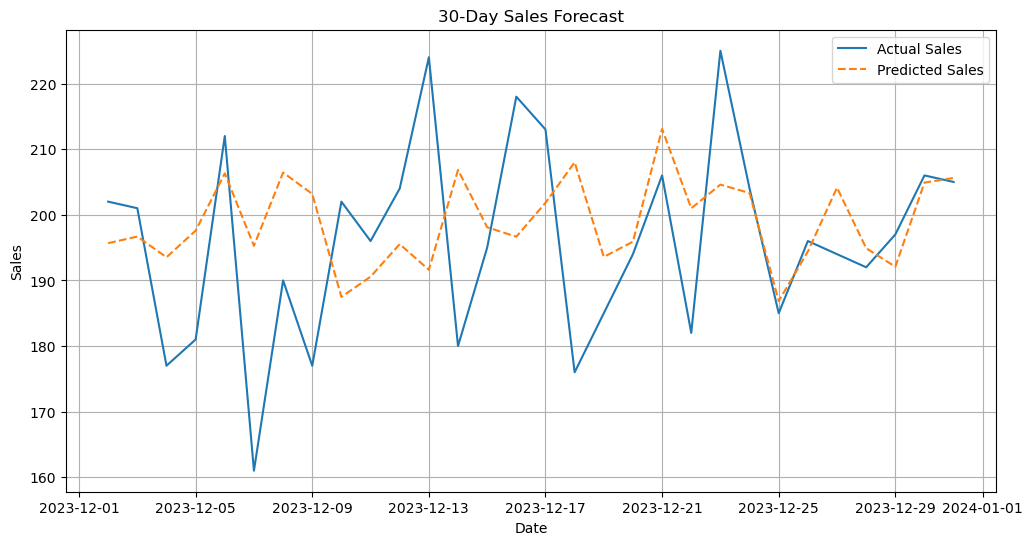

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Sales")
plt.plot(y_test.index, y_pred, label="Predicted Sales", linestyle='--')
plt.legend()
plt.title("30-Day Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()


In [ ]:
new_date = pd.to_datetime('2024-01-10')
new_data = pd.DataFrame({
    'dayofweek': [new_date.dayofweek],
    'day': [new_date.day],
    'month': [new_date.month],
    'year': [new_date.year]
})

prediction = model.predict(new_data)
pr